In [115]:
# 정리
# MZ 세대는 MZ 아닌 세대에 비해 직장인이 많아 급여입금액이 많았고, 
# 신용대출과 전세자금대출이 많았다.
# 특히, 전세자금 대출이 MZ 아닌 세대에 비해 30배 이상 많았고,
# 신용대출이 MZ 아닌 세대보다 많은 것이 특징이다.

# 그리고, MZ 세대의 직장인 여부가 3배 많은데 비해, 급여입금은 2배 많은 것
# 으로 보아, MZ 아닌 세대에 비해 급여는 상대적으로 적은 것을 알 수 있다.
# 기타 신탁금액, 수익증권금액, 주택대출금액은 MZ 아닌 세대에 비해
# 10배 이상 적은 것으로 보아, MZ 세대는 향후 이 금액이 증가할 것으로 예상됨.
# -> MZ 세대 중 잠재적인 신탁/수익증권금액, 주택대출 고객 추론.

# 급여입금금액과 신용대출금액의 상관관계가 0.5 이므로,
# 급여입금금액이 높으면 신용대출 금액도 높다고 할 수 있다.
# 따라서, 급여입금금액이 높은 MZ 세대가 신용대출금액도 많음을 유추할 수 있다.
# -> MZ 세대에게 신용대출 우대 서비스 제공

In [ ]:
# 지난번 분석에서 tree 모델을 사용하여 추가 분석.
# MZ세대와 MZ아닌세대를 구분하는 중요 feature 는 다음과 같다.
#1. 총수신금액 (<= 2384029.5)
#2. 예적금금액 (<= 36041.5)
#3. 총소비금액 (<= 1308922.0)
#4. 집계구코드 ()
#5. 법정동코드 ()

# 총수신금액(금융자산 합계): MZ 아님 > MZ 세대
# 예적금금액(예금, 적금 잔액): MZ 아님 > MZ 세대


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
shin1 = pd.read_excel('c:\\data\\fin\\finance_data201903.xlsx')

In [5]:
shin2 = pd.read_excel('c:\\data\\fin\\finance_data201909.xlsx')

In [6]:
shin3 = pd.read_excel('c:\\data\\fin\\finance_data202003.xlsx')

In [7]:
shin4 = pd.read_excel('c:\\data\\fin\\finance_data202009.xlsx')

In [8]:
shin5 = pd.read_excel('c:\\data\\fin\\finance_data202103.xlsx')

In [9]:
shin1['기준년월'].replace({201903:1}, inplace=True)
shin1['기준년월'].unique()

array([1], dtype=int64)

In [10]:
shin2['기준년월'].replace({201909:2}, inplace=True)
shin2['기준년월'].unique()

array([2], dtype=int64)

In [11]:
shin3['기준년월'].replace({202003:3}, inplace=True)
shin3['기준년월'].unique()

array([3], dtype=int64)

In [12]:
shin4['기준년월'].replace({202009:4}, inplace=True)
shin4['기준년월'].unique()

array([4], dtype=int64)

In [13]:
shin5['기준년월'].replace({202103:5}, inplace=True)
shin5['기준년월'].unique()

array([5], dtype=int64)

In [14]:
shin = pd.concat([shin1, shin2, shin3, shin4, shin5], axis=0)
shin

기준년월  지역구     법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  \
0          1  강남구  11680101  역삼동  1123064010001   2   1      0     0        0   
1          1  강남구  11680101  역삼동  1123064010001   2   2      0     0        0   
2          1  강남구  11680101  역삼동  1123064010001   3   1      0     0        0   
3          1  강남구  11680101  역삼동  1123064010001   3   2      0     0        0   
4          1  강남구  11680101  역삼동  1123064010001   4   1      0     0        0   
...      ...  ...       ...  ...            ...  ..  ..    ...   ...      ...   
211881     5  중랑구  11260106  신내동  1107070010802   5   2      0     0        0   
211882     5  중랑구  11260106  신내동  1107070010802   6   1      0     0        0   
211883     5  중랑구  11260106  신내동  1107070010802   6   2      0     0        0   
211884     5  중랑구  11260106  신내동  1107070010802   7   1      0     0        0   
211885     5  중랑구  11260106  신내동  1107070010802   7   2      0     0        0   

          연금입금    총소비금액    총수신금액     예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  \
0            0  2018319  2430312         0     0       0       0       0   
1            0  2326837  2221251         0     0       0       0       0   
2            0  1771639  1382057   1841250     0       0       0       0   
3            0  1745601  2902578   3561440     0       0       0       0   
4            0  1712433  1746992   8831666     0       0       0       0   
...        ...      ...      ...       ...   ...     ...     ...     ...   
211881       0  1425069  4369530   9185200     0       0       0       0   
211882  738450  2015000  6877740   2478000     0       0       0       0   
211883  595480  1495569  9297919  19789456     0       0       0       0   
211884  409938   812073  5018284         0     0       0       0       0   
211885  322286  1264725  6770482  15656170     0       0       0       0   

        주택대출금액  전세자금대출금액  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
211881       0         0  
211882       0         0  
211883       0         0  
211884       0         0  
211885       0         0  

[1039568 rows x 20 columns]

In [14]:
shin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039568 entries, 0 to 211885
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   기준년월      1039568 non-null  int64 
 1   지역구       1039568 non-null  object
 2   법정동코드     1039568 non-null  int64 
 3   법정동       1039568 non-null  object
 4   집계구코드     1039568 non-null  int64 
 5   나이        1039568 non-null  int64 
 6   성별        1039568 non-null  int64 
 7   직장인여부     1039568 non-null  int64 
 8   급여입금      1039568 non-null  int64 
 9   가맹점매출입금   1039568 non-null  int64 
 10  연금입금      1039568 non-null  int64 
 11  총소비금액     1039568 non-null  int64 
 12  총수신금액     1039568 non-null  int64 
 13  예적금금액     1039568 non-null  int64 
 14  신탁금액      1039568 non-null  int64 
 15  수익증권금액    1039568 non-null  int64 
 16  신용대출금액    1039568 non-null  int64 
 17  담보대출금액    1039568 non-null  int64 
 18  주택대출금액    1039568 non-null  int64 
 19  전세자금대출금액  1039568 non-null  int64 
dtypes: 

In [15]:
shin.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

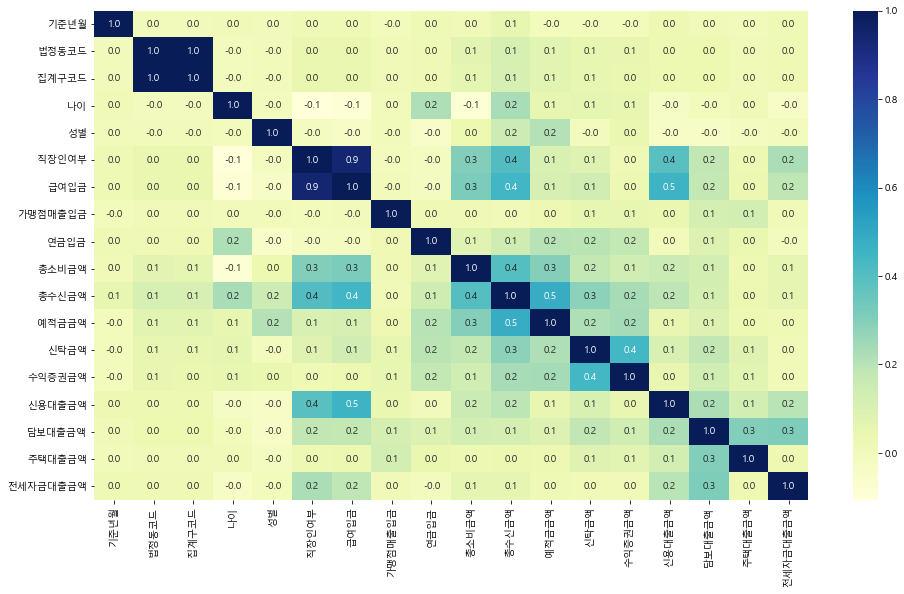

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(shin.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [17]:
shin[shin.columns[shin.dtypes.map(lambda x:x=='object')]].describe().transpose()

count unique  top   freq
지역구  1039568     25  송파구  68405
법정동  1039568    451  신림동  27423

In [18]:
# object encoding 은 수행하지 않음.

--------------- 성별 비율 -----------------
1   0.50556
2   0.49444
Name: 성별, dtype: float64
------------------------------------------


([<matplotlib.axis.XTick at 0x171d9615b20>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

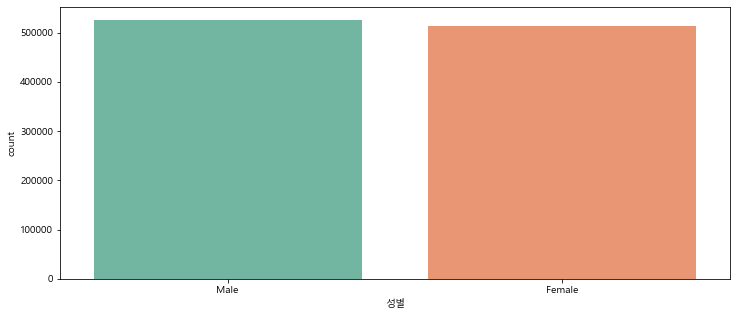

In [22]:
print('--------------- 성별 비율 -----------------')
print(shin['성별'].value_counts() / shin.shape[0])
print('------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(shin['성별'], palette='Set2')
plt.xticks([0,1], ['Male', 'Female'])

------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
3   0.18797
4   0.18306
5   0.17506
6   0.16018
2   0.15778
7   0.13596
Name: 나이, dtype: float64
-----------------------------------------------------------


<AxesSubplot:xlabel='나이', ylabel='count'>

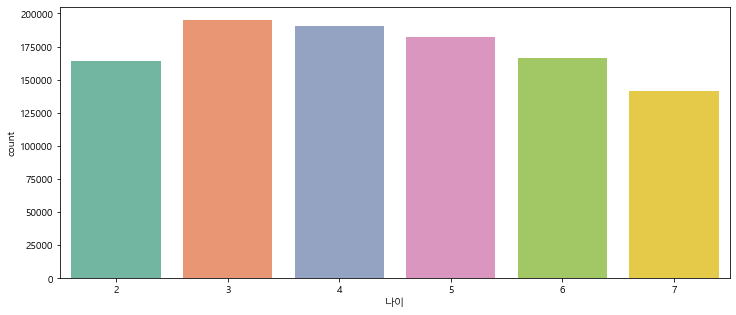

In [29]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(shin['나이'].value_counts() / shin.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(shin['나이'], palette='Set2')
#plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [30]:
shin['나이'].unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [31]:
shin_mz = shin.copy()
shin_mz['나이'].replace({2:1, 3:1, 4:0, 5:0, 6:0, 7:0}, inplace=True)
shin_mz.head()

기준년월  지역구     법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  \
0     1  강남구  11680101  역삼동  1123064010001   1   1      0     0        0   
1     1  강남구  11680101  역삼동  1123064010001   1   2      0     0        0   
2     1  강남구  11680101  역삼동  1123064010001   1   1      0     0        0   
3     1  강남구  11680101  역삼동  1123064010001   1   2      0     0        0   
4     1  강남구  11680101  역삼동  1123064010001   0   1      0     0        0   

   연금입금    총소비금액    총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  \
0     0  2018319  2430312        0     0       0       0       0       0   
1     0  2326837  2221251        0     0       0       0       0       0   
2     0  1771639  1382057  1841250     0       0       0       0       0   
3     0  1745601  2902578  3561440     0       0       0       0       0   
4     0  1712433  1746992  8831666     0       0       0       0       0   

   전세자금대출금액  
0         0  
1         0  
2         0  
3         0  
4         0

------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
0   0.65425
1   0.34575
Name: 나이, dtype: float64
-----------------------------------------------------------


([<matplotlib.axis.XTick at 0x171da41bd00>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

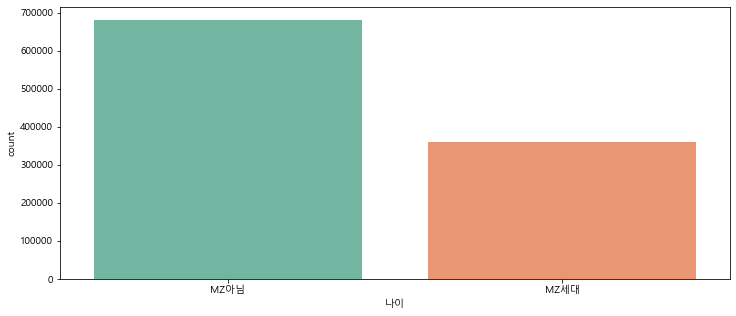

In [32]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(shin_mz['나이'].value_counts() / shin_mz.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(shin_mz['나이'], palette='Set2')
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [33]:
grouped = shin_mz.groupby(['나이']).mean()
grouped.reset_index(inplace=True)
grouped

나이    기준년월          법정동코드               집계구코드      성별   직장인여부         급여입금  \
0   0 3.02980 11451342.13264 1114414320459.06396 1.49258 0.02064  90990.48435   
1   1 3.00524 11454085.82044 1114518727663.63452 1.49795 0.06112 187071.27312   

     가맹점매출입금        연금입금         총소비금액         총수신금액         예적금금액  \
0 3821.94689 30193.89621 1227694.00551 4832326.77002 3828030.63276   
1  328.06354    17.80203 1132236.80614 3213539.84391 3089715.60521   

          신탁금액       수익증권금액       신용대출금액        담보대출금액       주택대출금액  \
0 785056.29412 325424.99821 357584.16792 1950970.83898 227588.86194   
1  51942.72142  29593.46417 501162.69697 1989233.35837  30188.57907   

      전세자금대출금액  
0  26125.39472  
1 742088.11636

In [34]:
grouped2 = grouped[['직장인여부', '급여입금', '가맹점매출입금', '총수신금액', '신탁금액','수익증권금액','신용대출금액','주택대출금액','전세자금대출금액']]
grouped2 = grouped2.transpose()
grouped2

0             1
직장인여부          0.02064       0.06112
급여입금       90990.48435  187071.27312
가맹점매출입금     3821.94689     328.06354
총수신금액    4832326.77002 3213539.84391
신탁금액      785056.29412   51942.72142
수익증권금액    325424.99821   29593.46417
신용대출금액    357584.16792  501162.69697
주택대출금액    227588.86194   30188.57907
전세자금대출금액   26125.39472  742088.11636

In [47]:
grouped3 = grouped2.loc[['급여입금','신탁금액', '수익증권금액', '신용대출금액', '주택대출금액', '전세자금대출금액'], :]

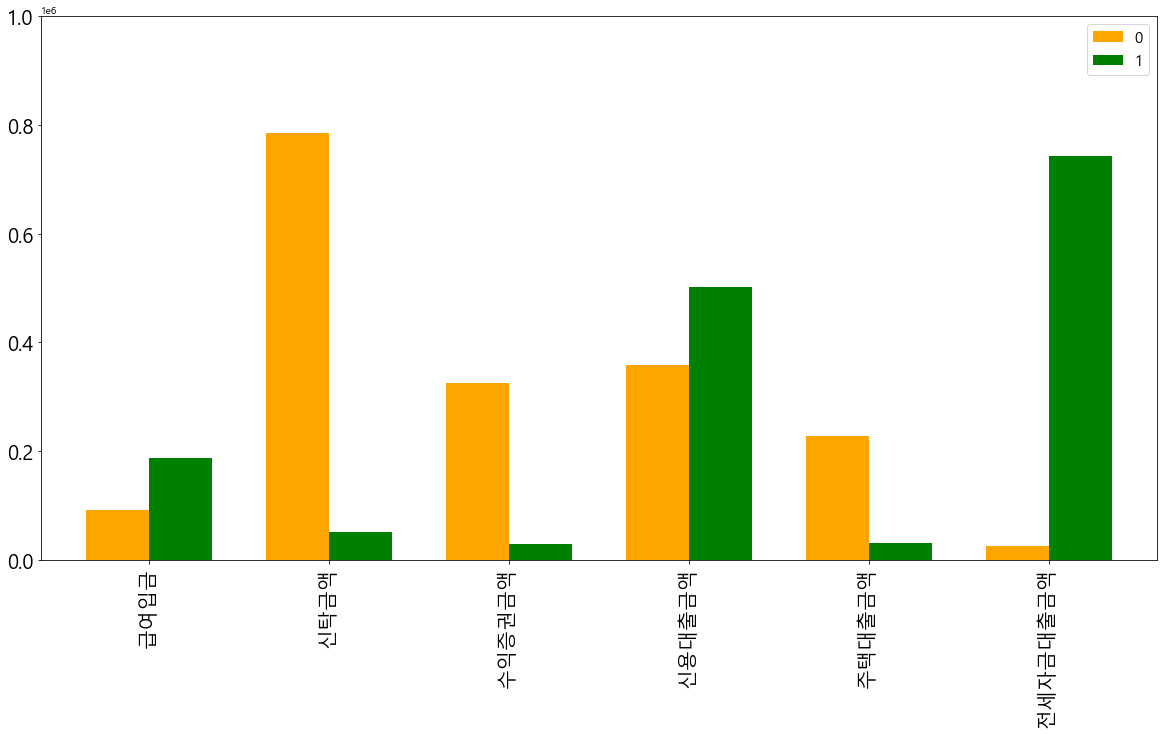

In [48]:
grouped3.plot(kind='bar', figsize=(20, 10), width=0.7,
             color=['orange', 'green'], fontsize=20)
plt.ylim(0, 1000000)
plt.legend(loc='best', fontsize=15)
plt.show()

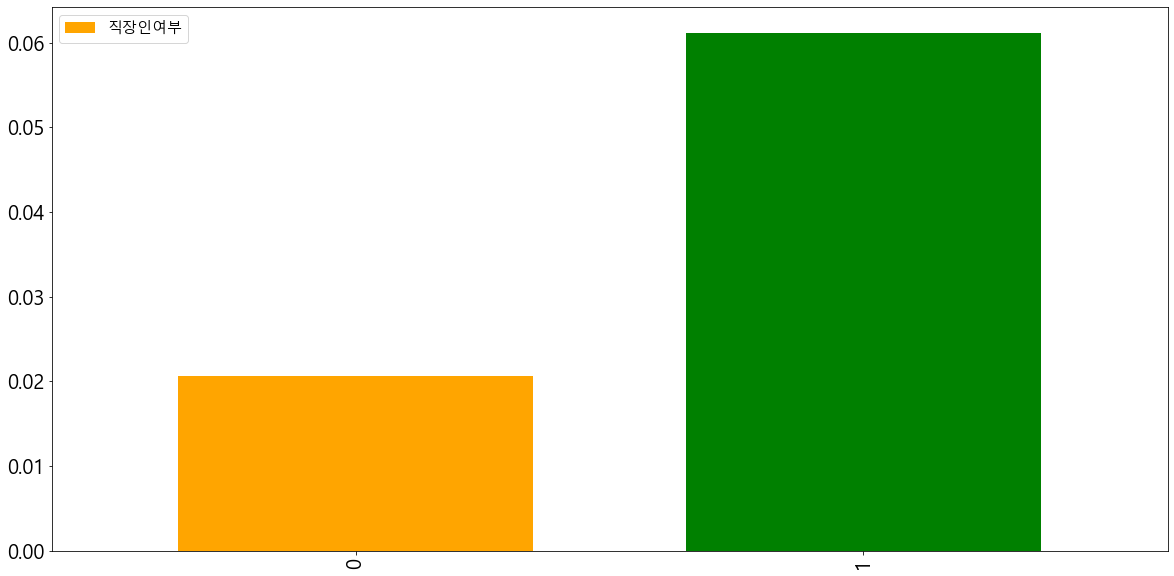

In [51]:
grouped2.loc['직장인여부'].plot(kind='bar', figsize=(20, 10), width=0.7,
             color=['orange', 'green'], fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

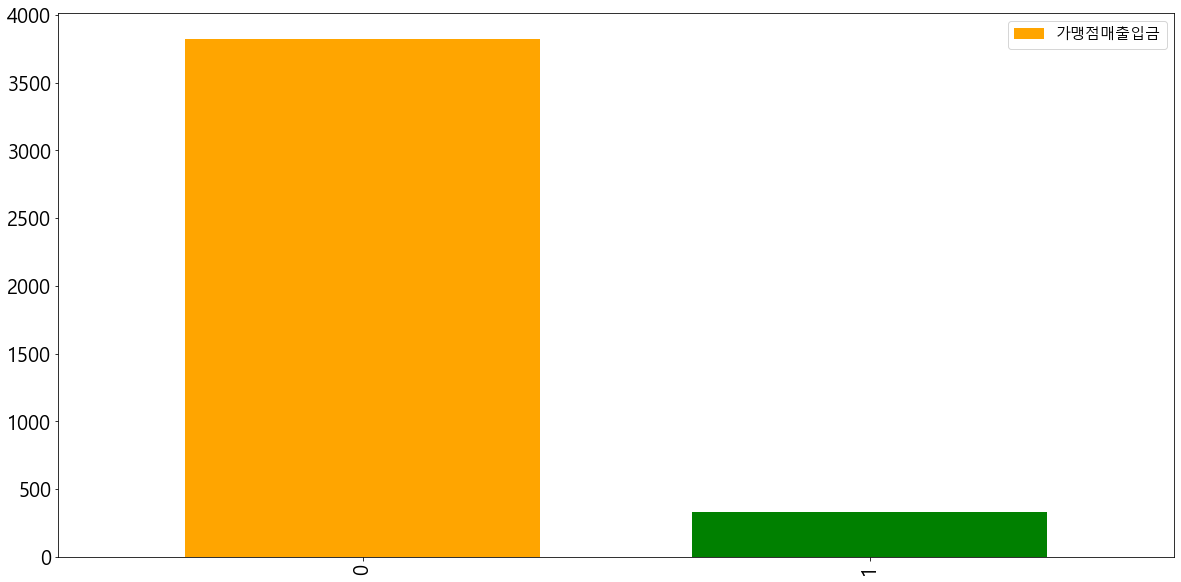

In [52]:
grouped2.loc['가맹점매출입금'].plot(kind='bar', figsize=(20, 10), width=0.7,
             color=['orange', 'green'], fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

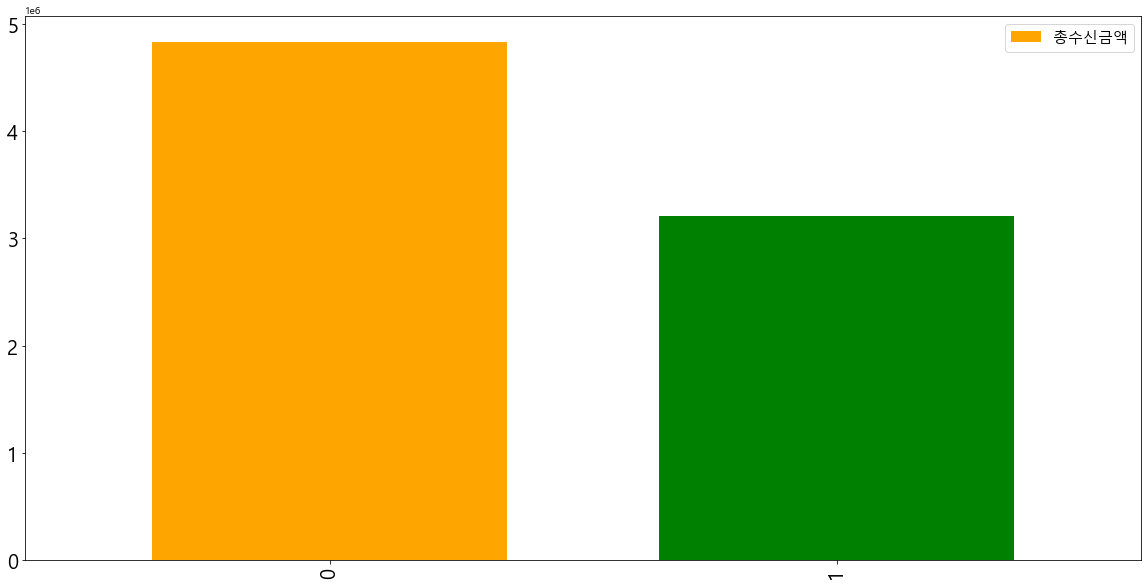

In [53]:
grouped2.loc['총수신금액'].plot(kind='bar', figsize=(20, 10), width=0.7,
             color=['orange', 'green'], fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

In [54]:
# MZ 세대는 MZ 아닌 세대에 비해 직장인이 많아 급여입금액이 많았고, 
# 신용대출과 전세자금대출이 많았다.
# 특히, 전세자금 대출이 MZ 아닌 세대에 비해 30배 이상 많았고,
# 신용대출이 MZ 아닌 세대보다 많은 것이 특징이다.
# 그리고, MZ 세대의 직장인 여부가 3배 많은데 비해, 급여입금은 2배 많은 것
# 으로 보아, MZ 아닌 세대에 비해 급여는 상대적으로 적은 것을 알 수 있다.
# 기타 신탁금액, 수익증권금액, 주택대출금액은 MZ 아닌 세대에 비해
# 10배 이상 적은 것으로 보아, MZ 세대는 향후 이 금액이 증가할 것으로 예상됨.

In [55]:
shin_mz.head()

기준년월  지역구     법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  \
0     1  강남구  11680101  역삼동  1123064010001   1   1      0     0        0   
1     1  강남구  11680101  역삼동  1123064010001   1   2      0     0        0   
2     1  강남구  11680101  역삼동  1123064010001   1   1      0     0        0   
3     1  강남구  11680101  역삼동  1123064010001   1   2      0     0        0   
4     1  강남구  11680101  역삼동  1123064010001   0   1      0     0        0   

   연금입금    총소비금액    총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  \
0     0  2018319  2430312        0     0       0       0       0       0   
1     0  2326837  2221251        0     0       0       0       0       0   
2     0  1771639  1382057  1841250     0       0       0       0       0   
3     0  1745601  2902578  3561440     0       0       0       0       0   
4     0  1712433  1746992  8831666     0       0       0       0       0   

   전세자금대출금액  
0         0  
1         0  
2         0  
3         0  
4         0

In [56]:
shin_mz.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [57]:
df = shin_mz[['기준년월', '법정동코드', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039568 entries, 0 to 211885
Data columns (total 18 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   기준년월      1039568 non-null  int64
 1   법정동코드     1039568 non-null  int64
 2   집계구코드     1039568 non-null  int64
 3   나이        1039568 non-null  int64
 4   성별        1039568 non-null  int64
 5   직장인여부     1039568 non-null  int64
 6   급여입금      1039568 non-null  int64
 7   가맹점매출입금   1039568 non-null  int64
 8   연금입금      1039568 non-null  int64
 9   총소비금액     1039568 non-null  int64
 10  총수신금액     1039568 non-null  int64
 11  예적금금액     1039568 non-null  int64
 12  신탁금액      1039568 non-null  int64
 13  수익증권금액    1039568 non-null  int64
 14  신용대출금액    1039568 non-null  int64
 15  담보대출금액    1039568 non-null  int64
 16  주택대출금액    1039568 non-null  int64
 17  전세자금대출금액  1039568 non-null  int64
dtypes: int64(18)
memory usage: 170.7 MB


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

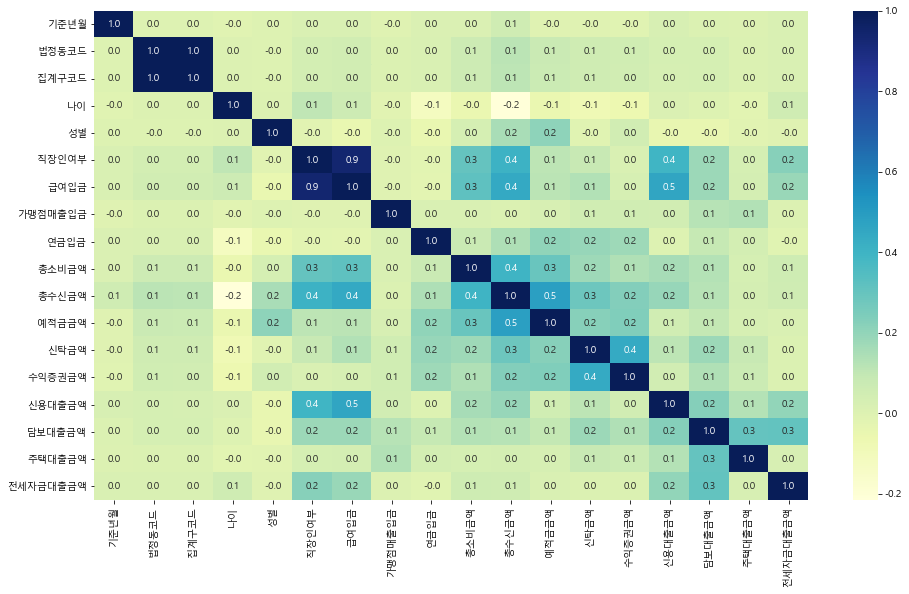

In [59]:
plt.figure(figsize=(16,9))
sns.heatmap(scaled_df.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [60]:
# 급여입금금액과 신용대출금액의 상관관계가 0.5 이므로,
# 급여입금금액이 높으면 신용대출 금액도 높다고 할 수 있다.
# 따라서, 급여입금금액이 높은 MZ 세대가 신용대출금액도 많음을 유추할 수 있다.
# -> MZ 세대에게 신용대출 우대 서비스 제공

In [61]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [62]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)
reduced_df.shape

(1039568, 2)

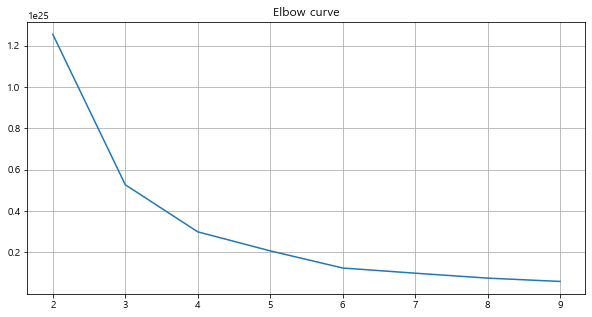

In [63]:
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [72]:
from sklearn import cluster

kmeans = cluster.KMeans(init='random', n_clusters=3, n_init=10)

kmeans.fit(df)

cluster_label = kmeans.labels_
df['cluster'] = cluster_label

df.head()

기준년월     법정동코드          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  연금입금    총소비금액  \
0     1  11680101  1123064010001   1   1      0     0        0     0  2018319   
1     1  11680101  1123064010001   1   2      0     0        0     0  2326837   
2     1  11680101  1123064010001   1   1      0     0        0     0  1771639   
3     1  11680101  1123064010001   1   2      0     0        0     0  1745601   
4     1  11680101  1123064010001   0   1      0     0        0     0  1712433   

     총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  전세자금대출금액  cluster  
0  2430312        0     0       0       0       0       0         0        0  
1  2221251        0     0       0       0       0       0         0        0  
2  1382057  1841250     0       0       0       0       0         0        0  
3  2902578  3561440     0       0       0       0       0         0        0  
4  1746992  8831666     0       0       0       0       0         0        0

In [73]:
df_kmeans_grouped = df.groupby('나이')
df_kmeans_grouped['cluster'].value_counts()

나이  cluster
0   0          244764
    2          243436
    1          191936
1   0          131792
    2          128035
    1           99605
Name: cluster, dtype: int64

In [74]:
e = pd.DataFrame(df_kmeans_grouped['cluster'].value_counts())
e.columns = ['count']
e.reset_index(inplace=True)
e

나이  cluster   count
0   0        0  244764
1   0        2  243436
2   0        1  191936
3   1        0  131792
4   1        2  128035
5   1        1   99605

<AxesSubplot:xlabel='나이', ylabel='count'>

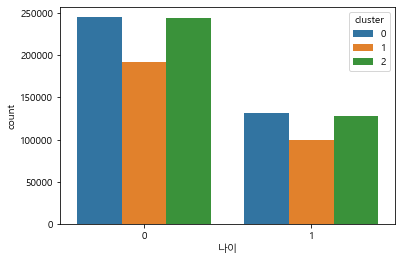

In [75]:
sns.barplot(x='나이', y='count', hue='cluster', data=e)

In [76]:
# 정답없이 분류하는 k-means 모델을 통해 MZ세대(1) 와 MZ아닌세대(0) 의
# 특징적인 cluster 가 있는지 확인해봤지만, 두 세대간 구별되는 차이 없음.

In [81]:
df = shin_mz[['기준년월', '법정동코드', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039568 entries, 0 to 211885
Data columns (total 18 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   기준년월      1039568 non-null  int64
 1   법정동코드     1039568 non-null  int64
 2   집계구코드     1039568 non-null  int64
 3   나이        1039568 non-null  int64
 4   성별        1039568 non-null  int64
 5   직장인여부     1039568 non-null  int64
 6   급여입금      1039568 non-null  int64
 7   가맹점매출입금   1039568 non-null  int64
 8   연금입금      1039568 non-null  int64
 9   총소비금액     1039568 non-null  int64
 10  총수신금액     1039568 non-null  int64
 11  예적금금액     1039568 non-null  int64
 12  신탁금액      1039568 non-null  int64
 13  수익증권금액    1039568 non-null  int64
 14  신용대출금액    1039568 non-null  int64
 15  담보대출금액    1039568 non-null  int64
 16  주택대출금액    1039568 non-null  int64
 17  전세자금대출금액  1039568 non-null  int64
dtypes: int64(18)
memory usage: 170.7 MB


In [85]:
df

기준년월     법정동코드          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금    연금입금  \
0          1  11680101  1123064010001   1   1      0     0        0       0   
1          1  11680101  1123064010001   1   2      0     0        0       0   
2          1  11680101  1123064010001   1   1      0     0        0       0   
3          1  11680101  1123064010001   1   2      0     0        0       0   
4          1  11680101  1123064010001   0   1      0     0        0       0   
...      ...       ...            ...  ..  ..    ...   ...      ...     ...   
211881     5  11260106  1107070010802   0   2      0     0        0       0   
211882     5  11260106  1107070010802   0   1      0     0        0  738450   
211883     5  11260106  1107070010802   0   2      0     0        0  595480   
211884     5  11260106  1107070010802   0   1      0     0        0  409938   
211885     5  11260106  1107070010802   0   2      0     0        0  322286   

          총소비금액    총수신금액     예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  \
0       2018319  2430312         0     0       0       0       0       0   
1       2326837  2221251         0     0       0       0       0       0   
2       1771639  1382057   1841250     0       0       0       0       0   
3       1745601  2902578   3561440     0       0       0       0       0   
4       1712433  1746992   8831666     0       0       0       0       0   
...         ...      ...       ...   ...     ...     ...     ...     ...   
211881  1425069  4369530   9185200     0       0       0       0       0   
211882  2015000  6877740   2478000     0       0       0       0       0   
211883  1495569  9297919  19789456     0       0       0       0       0   
211884   812073  5018284         0     0       0       0       0       0   
211885  1264725  6770482  15656170     0       0       0       0       0   

        전세자금대출금액  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
211881         0  
211882         0  
211883         0  
211884         0  
211885         0  

[1039568 rows x 18 columns]

In [102]:
x = df[['기준년월', '법정동코드', '집계구코드', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']][0:100000]
y = df['나이'][0:100000]

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)


(90000, 17)
(10000, 17)


In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_hat = knn.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[5185 1264]
 [1572 1979]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      6449
           1       0.61      0.56      0.58      3551

    accuracy                           0.72     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.71      0.72      0.71     10000



In [109]:
x = df[['기준년월', '법정동코드', '집계구코드', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']][0:10000]
y = df['나이'][0:10000]

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(9000, 17)
(1000, 17)


In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print((pred == y_test).mean())

0.705


In [111]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree_shin.dot',
                class_names='10',
                feature_names=['기준년월', '법정동코드', '집계구코드', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [112]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [113]:
import graphviz
with open('tree_shin.dot', 'r', encoding='UTF8') as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree_shin', format='svg') # svg로 저장

'tree_shin.svg'

In [114]:
import graphviz

with open('tree_shin.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [15]:
# 약 0.60의 정확도로 MZ 세대와 MZ 아닌 세대를 구분하는 인자는 아래와 같다.
# 1. 예적금금액
# 2. 직장인여부
# 3. 총수신금액

In [16]:
shin['나이'].unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [17]:
shin_mz = shin.copy()
shin_mz['나이'] = shin_mz['나이'].map(lambda x: 1 if x in [2, 3] else 0)
shin_mz['나이'].unique()

array([1, 0], dtype=int64)

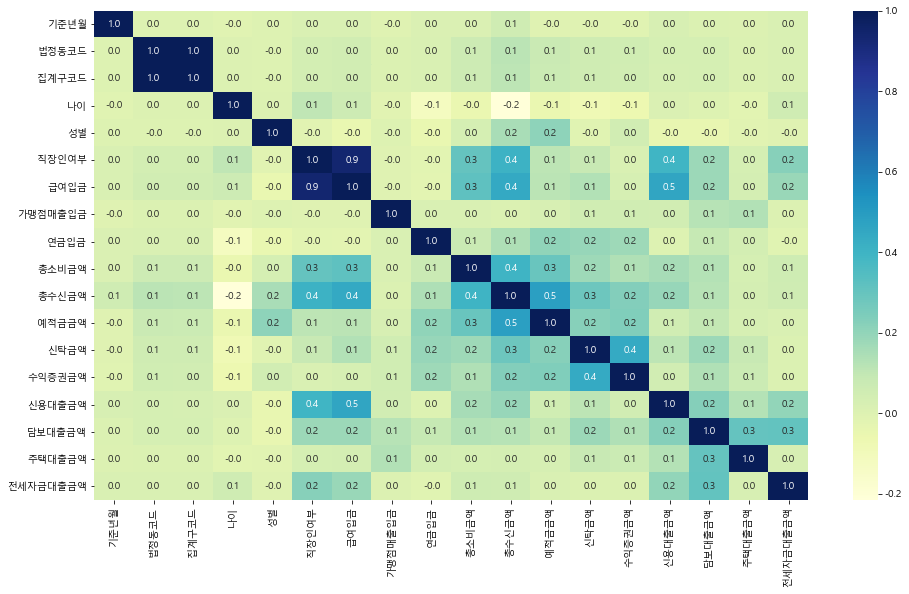

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(shin_mz.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [19]:
shin_mz[shin_mz.columns[shin_mz.dtypes.map(lambda x:x=='object')]].describe().transpose()

count unique  top   freq
지역구  1039568     25  송파구  68405
법정동  1039568    451  신림동  27423

In [20]:
shin_mz2 = shin_mz.copy()
shin_mz2.drop(['법정동'], axis=1, inplace=True)
shin_mz2.head()

기준년월  지역구     법정동코드          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  연금입금  \
0     1  강남구  11680101  1123064010001   1   1      0     0        0     0   
1     1  강남구  11680101  1123064010001   1   2      0     0        0     0   
2     1  강남구  11680101  1123064010001   1   1      0     0        0     0   
3     1  강남구  11680101  1123064010001   1   2      0     0        0     0   
4     1  강남구  11680101  1123064010001   0   1      0     0        0     0   

     총소비금액    총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  전세자금대출금액  
0  2018319  2430312        0     0       0       0       0       0         0  
1  2326837  2221251        0     0       0       0       0       0         0  
2  1771639  1382057  1841250     0       0       0       0       0         0  
3  1745601  2902578  3561440     0       0       0       0       0         0  
4  1712433  1746992  8831666     0       0       0       0       0         0

In [21]:
d_shin_mz2 = pd.get_dummies(shin_mz2)
d_shin_mz2.head()

기준년월     법정동코드          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  연금입금    총소비금액  \
0     1  11680101  1123064010001   1   1      0     0        0     0  2018319   
1     1  11680101  1123064010001   1   2      0     0        0     0  2326837   
2     1  11680101  1123064010001   1   1      0     0        0     0  1771639   
3     1  11680101  1123064010001   1   2      0     0        0     0  1745601   
4     1  11680101  1123064010001   0   1      0     0        0     0  1712433   

     총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  전세자금대출금액  지역구_강남구  \
0  2430312        0     0       0       0       0       0         0        1   
1  2221251        0     0       0       0       0       0         0        1   
2  1382057  1841250     0       0       0       0       0         0        1   
3  2902578  3561440     0       0       0       0       0         0        1   
4  1746992  8831666     0       0       0       0       0         0        1   

   지역구_강동구  지역구_강북구  지역구_강서구  지역구_관악구  지역구_광진구  지역구_구로구  지역구_금천구  지역구_노원구  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   지역구_도봉구  지역구_동대문구  지역구_동작구  지역구_마포구  지역구_서대문구  지역구_서초구  지역구_성동구  지역구_성북구  \
0        0         0        0        0         0        0        0        0   
1        0         0        0        0         0        0        0        0   
2        0         0        0        0         0        0        0        0   
3        0         0        0        0         0        0        0        0   
4        0         0        0        0         0        0        0        0   

   지역구_송파구  지역구_양천구  지역구_영등포구  지역구_용산구  지역구_은평구  지역구_종로구  지역구_중구  지역구_중랑구  
0        0        0         0        0        0        0       0        0  
1        0        0         0        0        0        0       0        0  
2        0        0         0        0        0        0       0        0  
3        0        0         0        0        0        0       0        0  
4        0        0         0        0        0        0       0        0

In [22]:
x = d_shin_mz2.loc[:, d_shin_mz2.columns != '나이']
y = d_shin_mz2['나이']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, pred)
print(knn_matrix)

from sklearn import metrics
model_report = metrics.classification_report(y_test, pred)
print(model_report)

[[102005  33999]
 [ 32838  39072]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75    136004
           1       0.53      0.54      0.54     71910

    accuracy                           0.68    207914
   macro avg       0.65      0.65      0.65    207914
weighted avg       0.68      0.68      0.68    207914



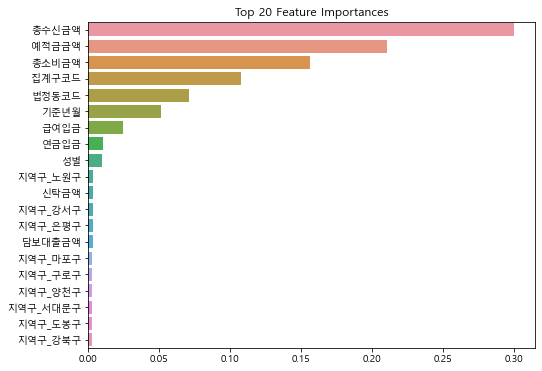

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [27]:
print(sum(pred==y_test)/len(y_test))

0.06357917215771906


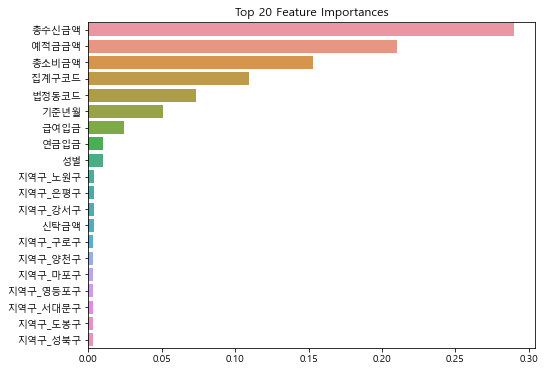

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [29]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree_shin.dot',
                class_names=['MZ아님','MZ세대'],
                feature_names=x.columns,
                max_depth=4,
                precision=3,
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [30]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [31]:
import graphviz
with open('tree_shin.dot', 'rt', encoding='UTF8') as file_reader:
    dot_graph = file_reader.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree_shin', format='svg') # svg로 저장

'tree_shin.svg'

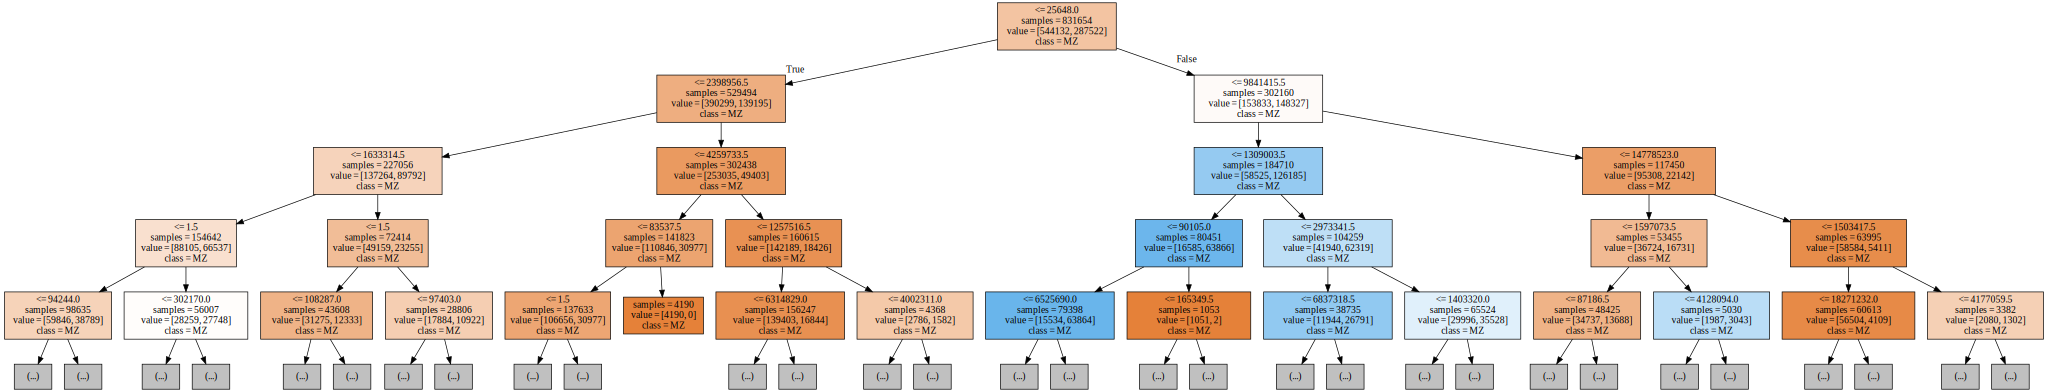

In [32]:
import graphviz

with open('tree_shin.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [33]:
keys = []
values = []
for i, j in zip(dt.feature_importances_, x.columns):
    keys.append(i)
    values.append(j)
    a = dict(zip(keys, values))
    
b = sorted(a.items(), reverse=True)
print(b)

[(0.29960904398328553, '총수신금액'), (0.2102979814662501, '예적금금액'), (0.15624775028031776, '총소비금액'), (0.10750849212432062, '집계구코드'), (0.07094919012951764, '법정동코드'), (0.051290344954530956, '기준년월'), (0.02430116806473824, '급여입금'), (0.009991742020021219, '연금입금'), (0.009524902618566951, '성별'), (0.0033226973878443845, '지역구_노원구'), (0.003296189120452601, '신탁금액'), (0.0030394662288562536, '지역구_강서구'), (0.0030099772504232113, '지역구_은평구'), (0.002925039533369001, '담보대출금액'), (0.002812418246043959, '지역구_마포구'), (0.0027307548863968966, '지역구_구로구'), (0.0027233819041639156, '지역구_양천구'), (0.0026512064562879798, '지역구_서대문구'), (0.0025697490376378964, '지역구_도봉구'), (0.002529978457795617, '지역구_강북구'), (0.002483553723331336, '지역구_성북구'), (0.002169675652885417, '지역구_금천구'), (0.0021640214726611354, '지역구_영등포구'), (0.0021347913858012053, '지역구_관악구'), (0.002093023413994953, '지역구_중랑구'), (0.002028129166044162, '지역구_동작구'), (0.0019146777673815223, '지역구_서초구'), (0.0018709620336285753, '지역구_강남구'), (0.0018597015056674875, '지역구_동대문구'), (0.0

In [34]:
# MZ세대와 MZ아닌세대를 구분하는 중요 feature 는 다음과 같다.
#1. 총수신금액 (<= 2384029.5)
#2. 예적금금액 (<= 36041.5)
#3. 총소비금액 (<= 1308922.0)
#4. 집계구코드 ()
#5. 법정동코드 ()

In [35]:
grouped = shin_mz2.groupby(['나이']).mean()
grouped.reset_index(inplace=True)
grouped

나이    기준년월          법정동코드               집계구코드      성별   직장인여부         급여입금  \
0   0 3.02980 11451342.13264 1114414320459.06396 1.49258 0.02064  90990.48435   
1   1 3.00524 11454085.82044 1114518727663.63452 1.49795 0.06112 187071.27312   

     가맹점매출입금        연금입금         총소비금액         총수신금액         예적금금액  \
0 3821.94689 30193.89621 1227694.00551 4832326.77002 3828030.63276   
1  328.06354    17.80203 1132236.80614 3213539.84391 3089715.60521   

          신탁금액       수익증권금액       신용대출금액        담보대출금액       주택대출금액  \
0 785056.29412 325424.99821 357584.16792 1950970.83898 227588.86194   
1  51942.72142  29593.46417 501162.69697 1989233.35837  30188.57907   

      전세자금대출금액  
0  26125.39472  
1 742088.11636

--------------- 세대 별 평균 매출금액 -----------------
          총수신금액
0 4832326.77002
1 3213539.84391
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x20a30e8e5e0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

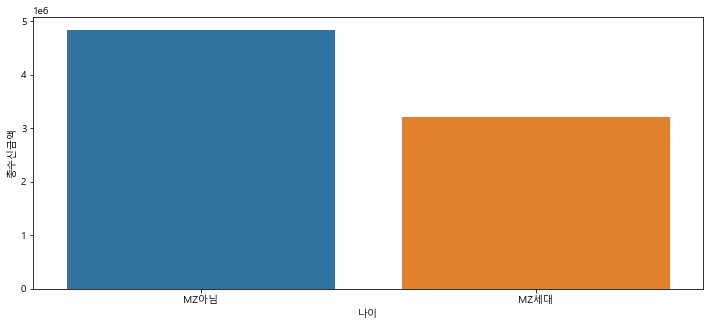

In [36]:
print('--------------- 세대 별 평균 매출금액 -----------------')
print(grouped[['총수신금액']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='나이', y='총수신금액', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

--------------- 세대 별 평균 매출금액 -----------------
          예적금금액
0 3828030.63276
1 3089715.60521
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x20a2bb13a60>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

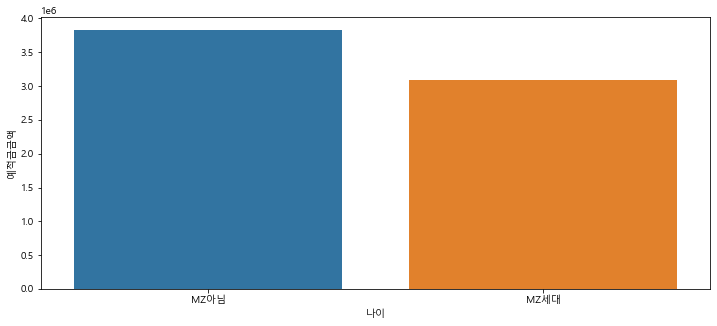

In [37]:
print('--------------- 세대 별 평균 매출금액 -----------------')
print(grouped[['예적금금액']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='나이', y='예적금금액', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

--------------- 세대 별 평균 매출금액 -----------------
          총소비금액
0 1227694.00551
1 1132236.80614
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x20a2c2566a0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

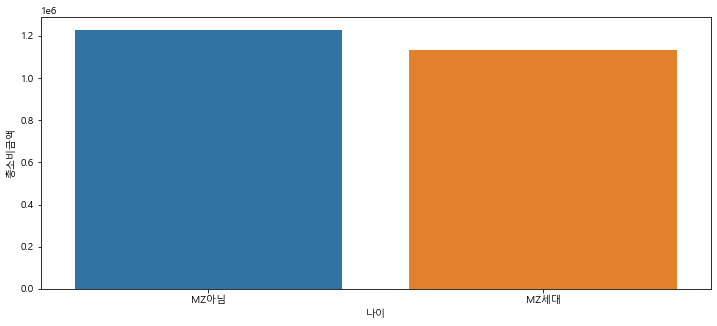

In [38]:
print('--------------- 세대 별 평균 매출금액 -----------------')
print(grouped[['총소비금액']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='나이', y='총소비금액', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])